In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn import tree


In [29]:
def tableResult(label, prediction):
    table = pd.DataFrame({'Actual':label, 'Predicted':prediction})
    print(table)

In [30]:
df_pokemon = pd.read_csv('./PokemonDBCart.csv')
df_pokemon.head()

,Nombre,Ataque,Defensa,Velocidad,HP,SpAtaque,SpDefensa,TipoPokemon
0,Bulbasaur,49,49,45,45,65,65,hierba
1,Ivysaur,62,63,60,60,80,80,hierba
2,Venusaur,100,123,80,80,122,120,hierba
3,Charmander,52,43,65,39,60,50,fuego
4,Charmeleon,64,58,80,58,80,65,fuego


In [31]:
df_pokemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479 entries, 0 to 478
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Nombre       479 non-null    object
 1   Ataque       479 non-null    int64 
 2   Defensa      479 non-null    int64 
 3   Velocidad    479 non-null    int64 
 4   HP           479 non-null    int64 
 5   SpAtaque     479 non-null    int64 
 6   SpDefensa    479 non-null    int64 
 7   TipoPokemon  479 non-null    object
dtypes: int64(6), object(2)
memory usage: 30.1+ KB


In [32]:
df_pokemon.describe()

,Ataque,Defensa,Velocidad,HP,SpAtaque,SpDefensa
count,479.000000,479.000000,479.000000,479.000000,479.000000,479.000000
mean,73.956159,70.657620,66.377871,66.705637,72.778706,70.824635
std,31.507258,29.291417,29.638710,24.807185,32.253524,28.020811
min,5.000000,5.000000,5.000000,1.000000,10.000000,20.000000
25%,50.000000,50.000000,45.000000,50.000000,50.000000,50.000000
50%,70.000000,65.000000,64.000000,65.000000,69.000000,66.000000
75%,94.500000,85.000000,85.000000,78.000000,95.000000,90.000000
max,185.000000,230.000000,180.000000,255.000000,194.000000,230.000000


In [33]:
df_pokemon.isna().sum()

Nombre         0
Ataque         0
Defensa        0
Velocidad      0
HP             0
SpAtaque       0
SpDefensa      0
TipoPokemon    0
dtype: int64

In [34]:
df_pokemon["TipoPokemon"].value_counts()

TipoPokemon
agua         80
hierba       78
bicho        72
normal       60
psiquico     53
fuego        52
roca         45
electrico    39
Name: count, dtype: int64

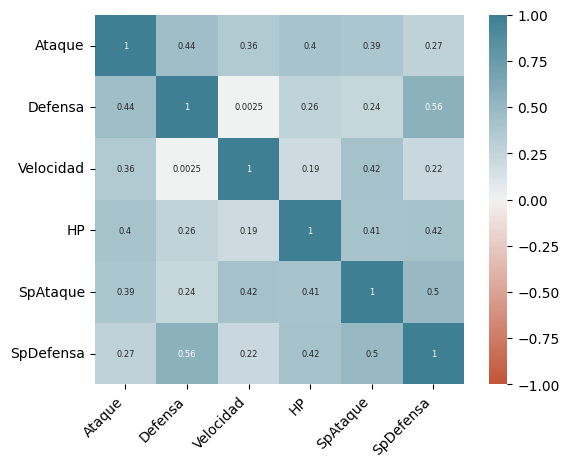

In [35]:
corr = df_pokemon.drop(columns=["Nombre", "TipoPokemon"]).corr()
ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot = True,
    annot_kws = {'size': 6}
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
plt.show()


In [36]:
df_pokemon

,Nombre,Ataque,Defensa,Velocidad,HP,SpAtaque,SpDefensa,TipoPokemon
0,Bulbasaur,49,49,45,45,65,65,hierba
1,Ivysaur,62,63,60,60,80,80,hierba
2,Venusaur,100,123,80,80,122,120,hierba
3,Charmander,52,43,65,39,60,50,fuego
4,Charmeleon,64,58,80,58,80,65,fuego
...,...,...,...,...,...,...,...,...
474,Buzzwole,139,139,79,107,53,53,bicho
475,Pheromosa,137,37,151,71,137,37,bicho
476,Xurkitree,89,71,83,83,173,71,electrico
477,Kartana,181,131,109,59,59,31,hierba


In [37]:
# Pasamos tipo pokemon a numerico
df_pokemon["TipoPokemon"] = df_pokemon["TipoPokemon"].astype('category')

In [38]:
X = df_pokemon.drop(columns=["TipoPokemon", "Nombre"])
y = df_pokemon["TipoPokemon"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)

Training set size: (383, 6)
Test set size: (96, 6)


In [39]:
# Lista de nombres de caracteristicas
features = X.columns

In [40]:
decision_tree = tree.DecisionTreeClassifier(max_depth=4, min_samples_leaf=5,
                                            random_state=13)

In [41]:
#Entreno el modelo pasando las características de entrenamiento y las etiquetas
# de entrenamiento correspondientes (X_train).
decision_tree.fit(X_train, y_train)

# Predicción en el conjunto de entrenamiento
predictions_train = decision_tree.predict(X_train)

# Predicción en el conjunto de prueba
predictions_test = decision_tree.predict(X_test)

#tableResult(y_train, predictions_train)
tableResult(y_test, predictions_test)

        Actual Predicted
93      hierba      agua
320   psiquico      agua
55        agua      agua
30       bicho     fuego
449     hierba    hierba
..         ...       ...
249  electrico     bicho
393       agua     fuego
425     hierba      agua
42        agua    hierba
228   psiquico     bicho

[96 rows x 2 columns]


In [42]:
from sklearn.metrics import accuracy_score

#Evaluo el rendimiento del modelo
train_accuracy = accuracy_score(y_train, predictions_train)
test_accuracy = accuracy_score(y_test, predictions_test)
print(f'Train accuracy: {train_accuracy} \nTest accuracy: {test_accuracy}')

Train accuracy: 0.37597911227154046 
Test accuracy: 0.2604166666666667


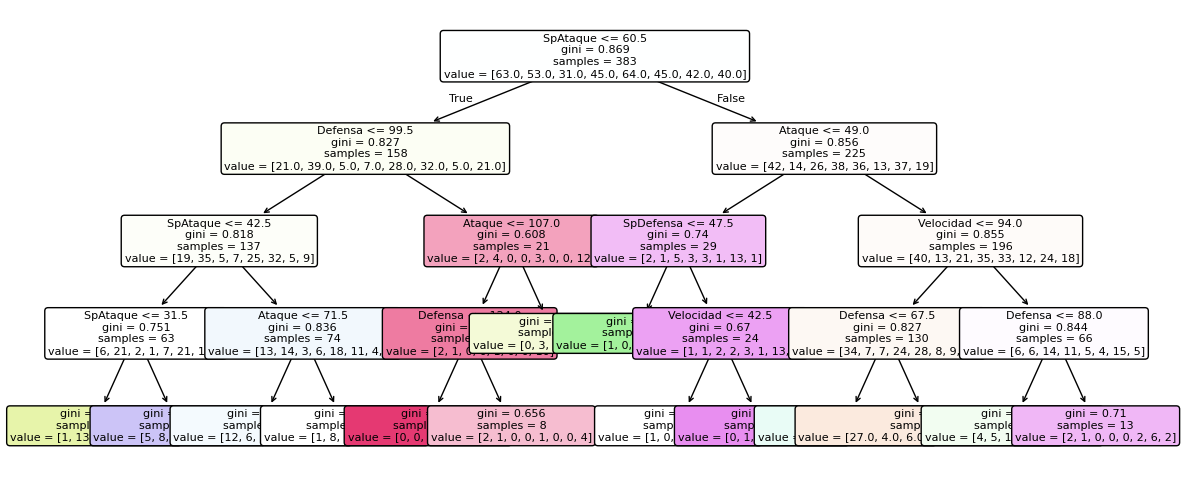

In [43]:
plt.figure(figsize=(14,6))
tree.plot_tree(decision_tree, feature_names=features, fontsize=8, filled=True,
               rounded=True)
plt.show()

In [44]:
r = tree.export_text(decision_tree, feature_names=features)
print(r)

|--- SpAtaque <= 60.50
|   |--- Defensa <= 99.50
|   |   |--- SpAtaque <= 42.50
|   |   |   |--- SpAtaque <= 31.50
|   |   |   |   |--- class: bicho
|   |   |   |--- SpAtaque >  31.50
|   |   |   |   |--- class: normal
|   |   |--- SpAtaque >  42.50
|   |   |   |--- Ataque <= 71.50
|   |   |   |   |--- class: hierba
|   |   |   |--- Ataque >  71.50
|   |   |   |   |--- class: bicho
|   |--- Defensa >  99.50
|   |   |--- Ataque <= 107.00
|   |   |   |--- Defensa <= 124.00
|   |   |   |   |--- class: roca
|   |   |   |--- Defensa >  124.00
|   |   |   |   |--- class: roca
|   |   |--- Ataque >  107.00
|   |   |   |--- class: bicho
|--- SpAtaque >  60.50
|   |--- Ataque <= 49.00
|   |   |--- SpDefensa <= 47.50
|   |   |   |--- class: electrico
|   |   |--- SpDefensa >  47.50
|   |   |   |--- Velocidad <= 42.50
|   |   |   |   |--- class: hierba
|   |   |   |--- Velocidad >  42.50
|   |   |   |   |--- class: psiquico
|   |--- Ataque >  49.00
|   |   |--- Velocidad <= 94.00
|   |   |   |---

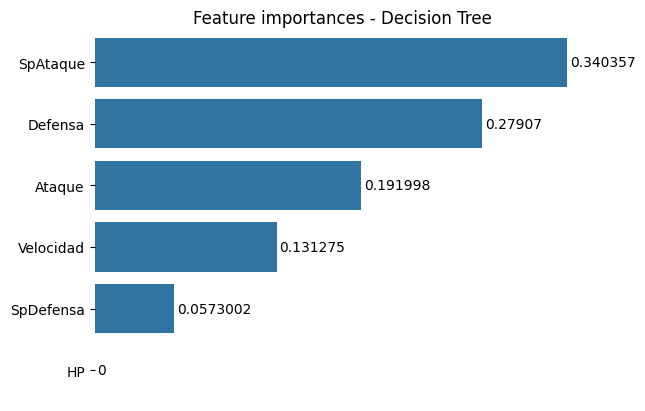

In [45]:
#Creo un df con dos columnas -> Caracteristica y ganacia de información
features_df = pd.DataFrame({'features': features,
                            'importances': decision_tree.feature_importances_ })

# Ordeno en base a la importancia
features_df_sorted = features_df.sort_values(by='importances', ascending=False)

g = sns.barplot(data=features_df_sorted, x='importances', y ='features')
sns.despine(bottom = True, left = True)
g.set_title('Feature importances - Decision Tree')
g.set(xlabel=None, ylabel=None, xticks=[])
for value in g.containers:
    g.bar_label(value, padding=2)